In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [2]:
raw_data = pd.read_csv("merged_gw.csv")
data = raw_data.drop(['team','xP', 'bonus','bps', 'bps', 'creativity', 'element', 'fixture','ict_index', 'influence', 
                      'kickoff_time', 'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 
                      'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'transfers_balance', 
                      'transfers_in', 'transfers_out', 'was_home', 'yellow_cards'],axis=1)
data.columns=['Name','Position','Assists','Clean Sheets','Goals conceded','Goals Scored','Minutes','Points','Costs','GW'] 
data = data[['Name','Position','Goals Scored', 'Assists', 'Clean Sheets', 'Goals conceded','Points','Minutes','GW','Costs']]

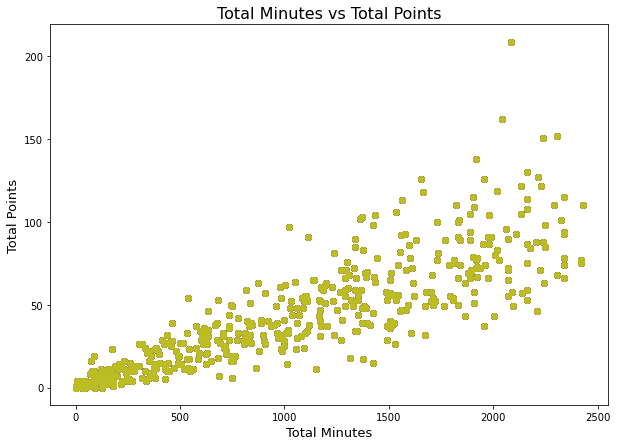

In [3]:
viz_data = pd.read_csv("cleaned_players.csv")
plt.figure(figsize=(10,7))
plt.xlabel('Total Minutes',size=13) 
plt.ylabel('Total Points',size=13)
plt.title("Total Minutes vs Total Points",size=16)
for i in viz_data:
    plt.scatter(viz_data['minutes'],viz_data['total_points'])
plt.show()

In [4]:
#Splitting the original data set into 4 based on position
GK_data = data[data['Position'] == 'GK']
DEF_data = data[data['Position'] == 'DEF']
MID_data = data[data['Position'] == 'MID']
FWD_data = data[data['Position'] == 'FWD']

In [5]:
#Credits to Woody Pride - stackoverflow
#Convert those 4 data sets to dictionaries
name_list = FWD_data['Name'].unique()
FWD_dict = {name : pd.DataFrame for name in name_list}
for key in FWD_dict.keys(): 
    FWD_dict[key] = data[:][data['Name'] == key]

name_list = DEF_data['Name'].unique()
DEF_dict = {name : pd.DataFrame for name in name_list}
for key in DEF_dict.keys(): 
    DEF_dict[key] = data[:][data['Name'] == key]
    
name_list = GK_data['Name'].unique()
GK_dict = {name : pd.DataFrame for name in name_list}
for key in GK_dict.keys(): 
    GK_dict[key] = data[:][data['Name'] == key]
    
name_list = MID_data['Name'].unique()
MID_dict = {name : pd.DataFrame for name in name_list}
for key in MID_dict.keys(): 
    MID_dict[key] = data[:][data['Name'] == key]

dictionary_list = [FWD_dict,MID_dict,DEF_dict,GK_dict]
tr_error_list = [] #Collecting the training error
val_error_list = [] #Collecting the validation error
test_error_list = [] #Collecting the test error

In [6]:
#Linear regression
FWD_pred_dict = {}
for player in FWD_dict:
    FWD_dict[player].insert(0,'Total Minutes',FWD_dict[player]['Minutes'].cumsum())
    FWD_dict[player].insert(0,'Total Points',FWD_dict[player]['Points'].cumsum())
    
    # Create the feature and label vectors
    X = FWD_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = FWD_dict[player]['Total Points'].to_numpy()

    #Splitting
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)

    if FWD_dict[player]['Total Minutes'].iloc[-1] >= 1350: #play less then 1350 minutes this season
        lin_regr = LinearRegression().fit(X, y)
        y_pred_train = lin_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        tr_error_list.append(tr_error)
        y_pred_val = lin_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)
        val_error_list.append(val_error)
        y_pred_test = lin_regr.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred_test)
        test_error_list.append(test_error)
        predicted_points = lin_regr.intercept_ + (lin_regr.coef_*(FWD_dict[player]['Total Minutes'].iloc[-1]+45) 
                                                  - FWD_dict[player]['Total Points'].iloc[-1])
        FWD_pred_dict[player] = round(predicted_points[0],2)

In [7]:
#Linear regression
DEF_pred_dict = {}
for player in DEF_dict:
    DEF_dict[player].insert(0,'Total Minutes',DEF_dict[player]['Minutes'].cumsum())
    DEF_dict[player].insert(0,'Total Points',DEF_dict[player]['Points'].cumsum())
    
    # Create the feature and label vectors
    X = DEF_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = DEF_dict[player]['Total Points'].to_numpy()

    #Splitting
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    
    if DEF_dict[player]['Total Minutes'].iloc[-1] >= 1350: #play less then 1350 minutes this season
        lin_regr = LinearRegression().fit(X, y)
        y_pred_train = lin_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        tr_error_list.append(tr_error)
        y_pred_val = lin_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)
        val_error_list.append(val_error)
        y_pred_test = lin_regr.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred_test)
        test_error_list.append(test_error)
        predicted_points = lin_regr.intercept_ + (lin_regr.coef_*(DEF_dict[player]['Total Minutes'].iloc[-1]+45) 
                                                  - DEF_dict[player]['Total Points'].iloc[-1])
        DEF_pred_dict[player] = round(predicted_points[0],2)

In [8]:
#Linear regression
MID_pred_dict = {}
for player in MID_dict:
    MID_dict[player].insert(0,'Total Minutes',MID_dict[player]['Minutes'].cumsum())
    MID_dict[player].insert(0,'Total Points',MID_dict[player]['Points'].cumsum())
    
    # Create the feature and label vectors
    X = MID_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = MID_dict[player]['Total Points'].to_numpy()

    #Splitting
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    
    if MID_dict[player]['Total Minutes'].iloc[-1] >= 1350: #play less then 1350 minutes this season
        lin_regr = LinearRegression().fit(X, y)
        y_pred_train = lin_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        tr_error_list.append(tr_error)
        y_pred_val = lin_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)
        val_error_list.append(val_error)    
        y_pred_test = lin_regr.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred_test)
        test_error_list.append(test_error)
        predicted_points = lin_regr.intercept_ + (lin_regr.coef_*(MID_dict[player]['Total Minutes'].iloc[-1]+45) 
                                                  - MID_dict[player]['Total Points'].iloc[-1])
        MID_pred_dict[player] = round(predicted_points[0],2)

In [9]:
#Linear regression
GK_pred_dict = {}
for player in GK_dict:
    GK_dict[player].insert(0,'Total Minutes',GK_dict[player]['Minutes'].cumsum())
    GK_dict[player].insert(0,'Total Points',GK_dict[player]['Points'].cumsum())
    
    # Create the feature and label vectors
    X = GK_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = GK_dict[player]['Total Points'].to_numpy()

    #Splitting
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    
    if GK_dict[player]['Total Minutes'].iloc[-1] >= 1350: #play less then 1350 minutes this season
        lin_regr = LinearRegression().fit(X, y)
        y_pred_train = lin_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        tr_error_list.append(tr_error)
        y_pred_val = lin_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)
        val_error_list.append(val_error)
        y_pred_test = lin_regr.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred_test)
        test_error_list.append(test_error)
        predicted_points = lin_regr.intercept_ + (lin_regr.coef_*(GK_dict[player]['Total Minutes'].iloc[-1]+45) 
                                                  - GK_dict[player]['Total Points'].iloc[-1])
        GK_pred_dict[player] = round(predicted_points[0],2)

In [10]:
#Credited to Devin Jeanpierre - stackoverflow
#List the top 5 footballers in each position

#FWD
dictsorted = dict(sorted(FWD_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended FWD:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", FWD_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#MID
dictsorted = dict(sorted(MID_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended MID:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", MID_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#DEF
dictsorted = dict(sorted(DEF_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended DEF:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", DEF_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#GK      
dictsorted = dict(sorted(GK_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended GK:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", GK_dict[i]['Costs'].iloc[-1] )
        count = count + 1

Recommended FWD:
Emmanuel Dennis  - Predicted points:  16.59  - Cost:  61
Armando Broja  - Predicted points:  12.99  - Cost:  55
Neal Maupay  - Predicted points:  10.72  - Cost:  65
Ollie Watkins  - Predicted points:  7.45  - Cost:  75
Joshua King  - Predicted points:  7.08  - Cost:  58
Richarlison de Andrade  - Predicted points:  6.51  - Cost:  75
Recommended MID:
Phil Foden  - Predicted points:  12.17  - Cost:  79
Raphael Dias Belloli  - Predicted points:  11.35  - Cost:  65
Bernardo Mota Veiga de Carvalho e Silva  - Predicted points:  10.56  - Cost:  72
Leandro Trossard  - Predicted points:  10.52  - Cost:  59
Conor Gallagher  - Predicted points:  9.35  - Cost:  61
Youri Tielemans  - Predicted points:  8.59  - Cost:  64
Recommended DEF:
Marc Cucurella  - Predicted points:  11.91  - Cost:  50
Jan Bednarek  - Predicted points:  11.53  - Cost:  44
Kieran Tierney  - Predicted points:  10.83  - Cost:  51
Romain Saïss  - Predicted points:  8.19  - Cost:  51
Grant Hanley  - Predicted point

In [11]:
#Calculating the average errors
print("The average errors of the Linear regression model are:")
print("  *The training error: ", sum(tr_error_list)/len(tr_error_list))
print("  *The validation error: ", sum(val_error_list)/len(val_error_list))
print("  *The test error: ", sum(test_error_list)/len(test_error_list))

The average errors of the Linear regression model are:
  *The training error:  13.323362201095522
  *The validation error:  14.999252546069942
  *The test error:  15.273670656282041


In [12]:
tr_error_list = [] #Collecting the training error
val_error_list = [] #Collecting the validation error
test_error_list = [] #Collecting the test error

In [13]:
#Polynomial regression
degrees = [2,3,5,6,7]
GK_pred_dict = {}
DEF_pred_dict = {}
MID_pred_dict = {}
FWD_pred_dict = {}
for i, degree in enumerate(degrees):
    tr_errors, val_errors, test_errors = [], [], []
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    for player in GK_dict:
        X = GK_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
        y = GK_dict[player]['Total Points'].to_numpy()
        X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
        if GK_dict[player]['Total Minutes'].iloc[-1] >= 1350:
            X_train_poly = poly.fit_transform(X_train)
            lin_regr.fit(X_train_poly, y_train) 
            y_pred_train = lin_regr.predict(X_train_poly)
            tr_error = mean_squared_error(y_train, y_pred_train)
            X_val_poly = poly.fit_transform(X_val)
            y_pred_val = lin_regr.predict(X_val_poly)
            val_error = mean_squared_error(y_val, y_pred_val)
            X_test_poly = poly.fit_transform(X_test)
            y_pred_test = lin_regr.predict(X_test_poly)
            test_error = mean_squared_error(y_test, y_pred_test)
            tr_errors.append(tr_error)
            val_errors.append(val_error)
            test_errors.append(test_error)
            
    for player in DEF_dict:
        X = DEF_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
        y = DEF_dict[player]['Total Points'].to_numpy()
        X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
        if DEF_dict[player]['Total Minutes'].iloc[-1] >= 1350:
            X_train_poly = poly.fit_transform(X_train)
            lin_regr.fit(X_train_poly, y_train) 
            y_pred_train = lin_regr.predict(X_train_poly)
            tr_error = mean_squared_error(y_train, y_pred_train)
            X_val_poly = poly.fit_transform(X_val)
            y_pred_val = lin_regr.predict(X_val_poly)
            val_error = mean_squared_error(y_val, y_pred_val)
            X_test_poly = poly.fit_transform(X_test)
            y_pred_test = lin_regr.predict(X_test_poly)
            test_error = mean_squared_error(y_test, y_pred_test)
            tr_errors.append(tr_error)
            val_errors.append(val_error)
            test_errors.append(test_error)

    for player in MID_dict:
        X = MID_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
        y = MID_dict[player]['Total Points'].to_numpy()
        X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
        if MID_dict[player]['Total Minutes'].iloc[-1] >= 1350:
            X_train_poly = poly.fit_transform(X_train)
            lin_regr.fit(X_train_poly, y_train) 
            y_pred_train = lin_regr.predict(X_train_poly)
            tr_error = mean_squared_error(y_train, y_pred_train)
            X_val_poly = poly.fit_transform(X_val)
            y_pred_val = lin_regr.predict(X_val_poly)
            val_error = mean_squared_error(y_val, y_pred_val)
            X_test_poly = poly.fit_transform(X_test)
            y_pred_test = lin_regr.predict(X_test_poly)
            test_error = mean_squared_error(y_test, y_pred_test)
            tr_errors.append(tr_error)
            val_errors.append(val_error)
            test_errors.append(test_error)

    for player in FWD_dict:
        X = FWD_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
        y = FWD_dict[player]['Total Points'].to_numpy()
        X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
        if FWD_dict[player]['Total Minutes'].iloc[-1] >= 1350:
            X_train_poly = poly.fit_transform(X_train)
            lin_regr.fit(X_train_poly, y_train) 
            y_pred_train = lin_regr.predict(X_train_poly)
            tr_error = mean_squared_error(y_train, y_pred_train)
            X_val_poly = poly.fit_transform(X_val)
            y_pred_val = lin_regr.predict(X_val_poly)
            val_error = mean_squared_error(y_val, y_pred_val)
            X_test_poly = poly.fit_transform(X_test)
            y_pred_test = lin_regr.predict(X_test_poly)
            test_error = mean_squared_error(y_test, y_pred_test)
            tr_errors.append(tr_error)
            val_errors.append(val_error)
            test_errors.append(test_error)
    
    tr_error_list.append(sum(tr_errors)/len(tr_errors))
    val_error_list.append(sum(val_errors)/len(val_errors))
    test_error_list.append(sum(test_errors)/len(test_errors))

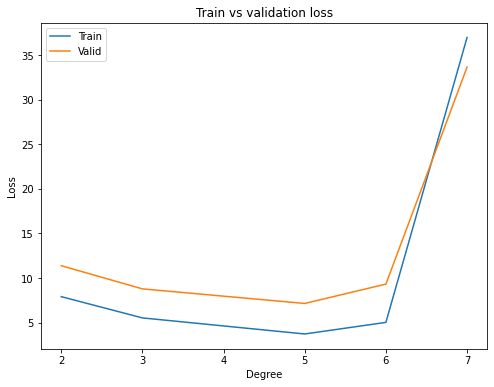

In [14]:
plt.figure(figsize=(8, 6))

plt.plot(degrees, tr_error_list, label = 'Train')
plt.plot(degrees, val_error_list,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [15]:
#Degree = 5
tr_errors = []
val_errors = [] 
test_errors = [] 
GK_pred_dict = {}
DEF_pred_dict = {}
MID_pred_dict = {}
FWD_pred_dict = {}

for player in GK_dict:
    lin_regrGK = LinearRegression(fit_intercept=False)
    polyGK = PolynomialFeatures(degree=5)
    X = GK_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = GK_dict[player]['Total Points'].to_numpy()
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    if GK_dict[player]['Total Minutes'].iloc[-1] >= 1350:
        X_train_poly = polyGK.fit_transform(X_train)
        lin_regrGK.fit(X_train_poly, y_train) 
        y_pred_train = lin_regrGK.predict(X_train_poly)
        tr_error = mean_squared_error(y_train, y_pred_train)
        X_val_poly = polyGK.fit_transform(X_val)
        y_pred_val = lin_regrGK.predict(X_val_poly)
        val_error = mean_squared_error(y_val, y_pred_val)
        X_test_poly = polyGK.fit_transform(X_test)
        y_pred_test = lin_regrGK.predict(X_test_poly)
        test_error = mean_squared_error(y_test, y_pred_test)
        tr_errors.append(tr_error)
        val_errors.append(val_error)
        test_errors.append(test_error)
        coE = lin_regrGK.coef_
        total = GK_dict[player]['Total Minutes'].iloc[-1]+45
        predicted_points = coE[0]*pow(total,0)+coE[1]*pow(total,1)+coE[2]*pow(total,2)+coE[3]*pow(total,3)+coE[4]*pow(total,4)+coE[5]*pow(total,5)        
        GK_pred_dict[player] = round(predicted_points - GK_dict[player]['Total Points'].iloc[-1],2)

for player in DEF_dict:
    lin_regrDEF = LinearRegression(fit_intercept=False)
    polyDEF = PolynomialFeatures(degree=5)
    X = DEF_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = DEF_dict[player]['Total Points'].to_numpy()
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    if DEF_dict[player]['Total Minutes'].iloc[-1] >= 1350:
        X_train_poly = polyDEF.fit_transform(X_train)
        lin_regrDEF.fit(X_train_poly, y_train) 
        y_pred_train = lin_regrDEF.predict(X_train_poly)
        tr_error = mean_squared_error(y_train, y_pred_train)
        X_val_poly = polyDEF.fit_transform(X_val)
        y_pred_val = lin_regrDEF.predict(X_val_poly)
        val_error = mean_squared_error(y_val, y_pred_val)
        X_test_poly = polyDEF.fit_transform(X_test)
        y_pred_test = lin_regrDEF.predict(X_test_poly)
        test_error = mean_squared_error(y_test, y_pred_test)
        tr_errors.append(tr_error)
        val_errors.append(val_error)
        test_errors.append(test_error)
        coE = lin_regrDEF.coef_
        total = DEF_dict[player]['Total Minutes'].iloc[-1]+45
        predicted_points = coE[0]*pow(total,0)+coE[1]*pow(total,1)+coE[2]*pow(total,2)+coE[3]*pow(total,3)+coE[4]*pow(total,4)+coE[5]*pow(total,5)        
        DEF_pred_dict[player] = round(predicted_points - DEF_dict[player]['Total Points'].iloc[-1],2)

for player in MID_dict:
    lin_regrMID = LinearRegression(fit_intercept=False)
    polyMID = PolynomialFeatures(degree=5)
    X = MID_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = MID_dict[player]['Total Points'].to_numpy()
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    if MID_dict[player]['Total Minutes'].iloc[-1] >= 1350:
        X_train_poly = polyMID.fit_transform(X_train)
        lin_regrMID.fit(X_train_poly, y_train) 
        y_pred_train = lin_regrMID.predict(X_train_poly)
        tr_error = mean_squared_error(y_train, y_pred_train)
        X_val_poly = polyMID.fit_transform(X_val)
        y_pred_val = lin_regrMID.predict(X_val_poly)
        val_error = mean_squared_error(y_val, y_pred_val)
        X_test_poly = polyMID.fit_transform(X_test)
        y_pred_test = lin_regrMID.predict(X_test_poly)
        test_error = mean_squared_error(y_test, y_pred_test)
        tr_errors.append(tr_error)
        val_errors.append(val_error)
        test_errors.append(test_error)
        coE = lin_regrMID.coef_
        total = MID_dict[player]['Total Minutes'].iloc[-1]+45
        predicted_points = coE[0]*pow(total,0)+coE[1]*pow(total,1)+coE[2]*pow(total,2)+coE[3]*pow(total,3)+coE[4]*pow(total,4)+coE[5]*pow(total,5)        
        MID_pred_dict[player] = round(predicted_points - MID_dict[player]['Total Points'].iloc[-1],2)

for player in FWD_dict:
    lin_regrFWD = LinearRegression(fit_intercept=False)
    polyFWD = PolynomialFeatures(degree=5)
    X = FWD_dict[player]['Total Minutes'].to_numpy().reshape(-1,1)
    y = FWD_dict[player]['Total Points'].to_numpy()
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.33, random_state=42)
    if FWD_dict[player]['Total Minutes'].iloc[-1] >= 1350:
        X_train_poly = polyFWD.fit_transform(X_train)
        lin_regrFWD.fit(X_train_poly, y_train) 
        y_pred_train = lin_regrFWD.predict(X_train_poly)
        tr_error = mean_squared_error(y_train, y_pred_train)
        X_val_poly = polyFWD.fit_transform(X_val)
        y_pred_val = lin_regrFWD.predict(X_val_poly)
        val_error = mean_squared_error(y_val, y_pred_val)
        X_test_poly = polyFWD.fit_transform(X_test)
        y_pred_test = lin_regrFWD.predict(X_test_poly)
        test_error = mean_squared_error(y_test, y_pred_test)
        tr_errors.append(tr_error)
        val_errors.append(val_error)
        test_errors.append(test_error)
        coE = lin_regrFWD.coef_
        total = FWD_dict[player]['Total Minutes'].iloc[-1]+45
        predicted_points = coE[0]*pow(total,0)+coE[1]*pow(total,1)+coE[2]*pow(total,2)+coE[3]*pow(total,3)+coE[4]*pow(total,4)+coE[5]*pow(total,5)        
        FWD_pred_dict[player] = round(predicted_points - FWD_dict[player]['Total Points'].iloc[-1],2)
    

In [16]:
#Credited to Devin Jeanpierre - stackoverflow
#List the top 5 footballers in each position

#FWD
dictsorted = dict(sorted(FWD_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended FWD:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", FWD_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#MID
dictsorted = dict(sorted(MID_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended MID:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", MID_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#DEF
dictsorted = dict(sorted(DEF_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended DEF:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", DEF_dict[i]['Costs'].iloc[-1] )
        count = count + 1

#GK      
dictsorted = dict(sorted(GK_pred_dict.items(), key=lambda item: item[1], reverse=True))
count = 0
print("Recommended GK:")
for i in dictsorted:
    if count > 5:
        break
    else:
        print(i," - Predicted points: ", dictsorted[i], " - Cost: ", GK_dict[i]['Costs'].iloc[-1] )
        count = count + 1

Recommended FWD:
Jamie Vardy  - Predicted points:  7.84  - Cost:  103
Cristiano Ronaldo dos Santos Aveiro  - Predicted points:  7.16  - Cost:  123
Ivan Toney  - Predicted points:  7.02  - Cost:  66
Danny Ings  - Predicted points:  6.97  - Cost:  77
Emmanuel Dennis  - Predicted points:  6.25  - Cost:  61
Harry Kane  - Predicted points:  6.18  - Cost:  124
Recommended MID:
Diogo Jota  - Predicted points:  14.76  - Cost:  83
Mohamed Salah  - Predicted points:  12.74  - Cost:  133
Mason Mount  - Predicted points:  9.0  - Cost:  75
Raheem Sterling  - Predicted points:  7.04  - Cost:  106
James Maddison  - Predicted points:  6.44  - Cost:  67
Nathan Redmond  - Predicted points:  6.44  - Cost:  59
Recommended DEF:
Tino Livramento  - Predicted points:  8.13  - Cost:  44
Trent Alexander-Arnold  - Predicted points:  8.02  - Cost:  85
Joel Matip  - Predicted points:  7.6  - Cost:  49
Antonio Rüdiger  - Predicted points:  6.08  - Cost:  61
Luke Ayling  - Predicted points:  5.85  - Cost:  43
Virgil

In [17]:
#Calculating the average errors
print("The average errors of the Linear regression model are:")
print("  *The training error: ", sum(tr_errors)/len(tr_errors))
print("  *The validation error: ", sum(val_errors)/len(val_errors))
print("  *The test error: ", sum(test_errors)/len(test_errors))

The average errors of the Linear regression model are:
  *The training error:  3.7343609502079897
  *The validation error:  7.15471104467227
  *The test error:  6.527039648431503
